
# Sentiment Analysis of Reviews

## Naïve Bayes classifier

In this first part of this lab, we are going to implement the Naïve Bayes classifier for the sentiment analysis of car reviews.

First, we need to import necessary libraries and packages to faciliate our work.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
nltk.download('punkt')
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Andy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Now we need to import the raw dataset of reviews for Ford motor vehicles using csv reading library  - pandas.

In [2]:
df = pd.read_csv (r'C:\Users\Andy\Downloads\course\CM50266 - ADS\Lab2\car_reviews.csv')
df.head()

,Sentiment,Review
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...


Right now, the dataset is having categorical data for the sentiment as "Pos" and "Neg". 

To assist for machine learning classifer, we will covert them to numerical value 0 and 1.
The function <b>pd.get_dummies</b> is used here for this purpose.

In [3]:
sen = pd.get_dummies(df['Sentiment'])
sen.drop('Neg',inplace=True, axis=1)
df['senti'] = sen['Pos']
df = df[['Sentiment', 'senti', 'Review']]
df

,Sentiment,senti,Review
0,Neg,0,In 1992 we bought a new Taurus and we really ...
1,Neg,0,The last business trip I drove to San Franci...
2,Neg,0,My husband and I purchased a 1990 Ford F250 a...
3,Neg,0,I feel I have a thorough opinion of this truc...
4,Neg,0,AS a mother of 3 all of whom are still in ca...
...,...,...,...
1377,Pos,1,In June we bought the Sony Limited Edition Fo...
1378,Pos,1,After 140 000 miles we decided to replace my...
1379,Pos,1,The Ford Focus is a great little record setti...
1380,Pos,1,I needed a new car because my hyundai excel 9...


At this point, we still need to perform a lot of clean up work for the data before using it in the classifier. This include:
- Identifying and excluding all punctuation and words that are not likely to affect sentiment (e.g. stopwords)
- ensuring that remaining words are not case sensitive
-  treat minor variations of a word (e.g. ‘fault’, ‘faults’ and ‘faulty’) as instances of the same word (e.g. ‘fault’) when using them in your classifier. (i.e the stemming process)

In [4]:
stop_words = set(stopwords.words('english'))
review = []
for i in range(len(df['Review'])):
    value = df["Review"].iloc[i]
    word_tokens = word_tokenize(value)
    ps = PorterStemmer()
    #filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = [ps.stem(w) for w in word_tokens if not w.lower() in stop_words]
    filtered_sentence = ' '.join(filtered_sentence)
    review.append(filtered_sentence)

Below is going to demonstrate what have been done to the above data cleaning process.

In [5]:
print(stop_words)

{'wouldn', 'this', "isn't", 'all', 'were', 'i', 'did', 'whom', 'haven', 'ours', "mustn't", 'through', 'but', 'that', "shouldn't", 'which', 'there', 'against', 'too', 'or', 'we', 'before', 'not', 'am', 'an', 'on', 'will', 'can', "wouldn't", 'd', 'him', 'the', 'wasn', 'me', 'more', 'of', 'so', 'about', "didn't", "couldn't", 'it', 'being', 'those', 'if', 'you', 'was', 'who', 'ain', 'with', 'y', 'under', 'our', 'its', 'into', 'ourselves', 'out', 'other', "hadn't", 'very', 'yourself', 'do', 'what', 'won', 'once', 'by', 'isn', 'her', 'doesn', 'after', 'where', 'themselves', 'my', 'just', 'now', "wasn't", 'mustn', 'are', 'as', 'yourselves', 'mightn', 'them', 'during', 'nor', 'again', 'needn', 'than', 'be', 'off', 'how', 'both', 'these', 'down', 'aren', 'weren', 'does', 's', 'yours', 'no', 'he', 're', 'shouldn', 'below', 'herself', 'above', 'over', 've', 'don', "you're", 'having', "hasn't", 'shan', 'been', "she's", 'such', 'your', "it's", "weren't", 'while', 'when', 'ma', 'most', "aren't", 'ow

The above print result shows all the stopwords that are not likely to affect the sentiment. This list comes from the python <b>NLTK libarary</b> that we import at the beginning. PorterStemmer and word_tokenize from <b>NLTK libarary</b> are also used to assist word tokenize and the stemming process.

A for loop is used in here to iterate every single review in the csv file. Here we remove all the stopwords and apply the stemming process to treat similar words as equal with no sentivity to case. 

Below we will take the first 2 reviews from the raw data and prove that they contains <b>no stopwords/punctuation</b> and <b>not case sensitive</b>.

In [6]:
print(review[0])
print(review[1])
print("\n")
print('This first review only contains lower case words is ' + str(review[0].islower()))
print('This second review only contains lower case words is ' + str(review[1].islower()))

lstreview0 = [x for x in review[0].split()]
print('The number of stopwords contained in the first review is = '+ str(len([w for w in stop_words if w in lstreview0])))
lstreview1 = [x for x in review[1].split()]
print('The number of stopwords contained in the second review is = '+ str(len([w for w in stop_words if w in lstreview1])))

for i in review[0]:
    count0 = 0
    if i in string.punctuation:
        count0 += 1
        
for i in review[1]:
    count1 = 0
    if i in string.punctuation:
        count1 += 1
        
print('The number of punctuation contained in the first review is = '+ str(count0))
print('The number of punctuation contained in the second review is = '+ str(count1))        

1992 bought new tauru realli love 1999 decid tri new tauru care style newer version bought anyway like new car half much like one thee dash much deep take lot room find seat comfort way side stick strip protect card dent drive nice good pick see hood driver seat judg park difficult small ga tank would buy tauru would rather 1992 back think style nice 1992 mistak chang style less month dead batteri flat tire
last busi trip drove san francisco went hertz rental got 1999 ford tauru think look comfort profession found seat uncomfort well passeng seat comfort may import fuel usag fine car get us problem uncomfort ride us though hard fit car 5 5 weigh 115 pound usual quit comfort car tauru seem especi uncomfort anyon think rent car long trip would suggest ford tauru 1999 list sure get larg trunk allow us pack lot materi need busi end trip drive breez everyth work right complaint standard make car except comfort area import comfort long trip uncomfort driver distract made trip seem unnecessar

Below we are going to show how the stemming process is applied to treat similar words.

The code are exactly the same with the above, however instead of the original reviews, 3 different list of words will be shown in this part for clear explanation. They will be using the same method: <b>ps.stem from NLTK</b>, to stemmed into the same root.

In [7]:
valuelst = ['program programmer programming', 'likes likely liking liked', 'retrieval retrieved retrieves']
exp = []
for s in valuelst:
    word_tokens = word_tokenize(s)
    ps = PorterStemmer()
    filtered_sentence = [ps.stem(w) for w in word_tokens if not w.lower() in stop_words]
    exp.append(filtered_sentence)
print(exp)

[['program', 'programm', 'program'], ['like', 'like', 'like', 'like'], ['retriev', 'retriev', 'retriev']]


To avoid data leakage, we need to split our data before applying the Naïve Bayes model. By seperating the dependent variable into x_train and x_test, we can ensure that only the training data is used to train up the model.

Below the <b>train_test_split function</b> from sklearn is used to split the data randomly, where 80% (1106) of the reviews will be training data, and 20% (276) of them will be testing data. We will be analyzing the effect of the independent X variable (reviews) on the dependent Y variable (sentiment).

In [8]:
x = np.array(review)
y = df.iloc[:, 1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.199, random_state=2)


At this part, we will make use of the <b>class CountVectorizer()</b> from sklearn to transform each review in to a vector.

In the print result, we can see the shape of x_train1 = (1106, 10087), where 1106 represent the number of reviews in the training data, and 10087 represent the features (or the size of the bag of words) of the training data. The number inside each vector also represent the the number of times that a word (or word stem) appears in each review.


In [9]:
# Generate counts from text using a vectorizer. This perform our step of computing word counts.  
# No parameter was set here, by default unigram will be used.  
cv = CountVectorizer()
# train and test data (x_train, x_test, y_train, y_test) have been splitted.
# Generate counts from text using a vectorizer. This perform our step of computing word counts.
x_train1 = cv.fit_transform(x_train).toarray()
x_test1 = cv.transform(x_test).toarray()
print(x_train1)
print(x_train1.shape)
print(x_test1.shape)



[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 7 0 ... 0 0 0]]
(1106, 10087)
(276, 10087)


Next part, we are going to implement the NaïveBayes model to our data.

There are several type of <b>event models</b> for the NaïveBayes, including Gaussian naïve Bayes, Multinomial naïve Bayes and Bernoulli naïve Bayes model. 

For this task, we are required to perform sentiment analysis. From the three models, <b>Multinomial naïve Bayes</b> is the most suitable one. As our data which consist of different words in each review (feature vectors) represent the frequencies with which certain events have been generated by a multinomial <b>(p1,.....,pn)</b> where pi is the probability that event i occurs. 

As seen from the printed x_train1 result above, each review is shaped into a feature factor, <b>counting the number of times event i</b> was observed in a particular instance. This is the event model typically used for document classification, with events representing the occurrence of a word in a single document.


We imported the MultinominalNB from the sklearn library. 
The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification). We used the x_train and y_train data to fit the model, and then use the model to get y_pred from x_test data. Finally, we caculate the confusion matrix with a 77.90% of accuracy.

In [10]:
from sklearn.naive_bayes import MultinomialNB
# Fit a naive bayes model to the training data.
# This will train the model using the word counts we compute, and the existing classifications in the training set.
mnb = MultinomialNB()
mnb.fit(x_train1,y_train)
# Now we can use the model to predict classifications for our test features.
y_pred = mnb.predict(x_test1)
from sklearn.metrics import confusion_matrix

# Finally we use the prediction result and compare with the inital test data classifier to check the accuracy.
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)
cm_acc = (cm[0][0]+cm[1][1])/cm.sum()
print('The accuracy rate is {}%'.format(round(cm_acc*100,2)))

Confusion Matrix
[[101  36]
 [ 25 114]]
The accuracy rate is 77.9%


Below output demonstrate the performance of the Naïve Bayes classifier.

The confusion matrix clearly indicate the proportion of True Negatives, False Positives, False Negatives and True Positives.

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

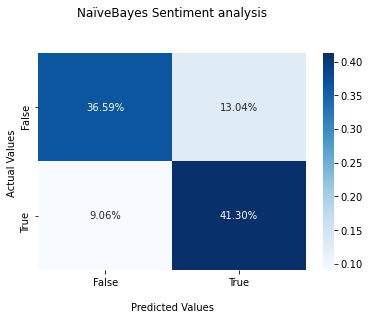

In [11]:
import seaborn as sns
ax = sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('NaïveBayes Sentiment analysis\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.


## Task 2 Improvements

In the second part of this lab, we are going to identify and research a way to improve on the solution from the NB classifer.

From task 1, we can see that the Multinomial naïve Bayes classifer is using an unigram approach. Reviews are being splitted to single words to fit in the training model. But this might not be the best approach, as if you look at the word <b>'not good'</b>, unigram will seperate it into 'not' and 'good'. We would only consider these two words individually with a unigram-only model and probably not capture that this is actually a <b>negative sentiment</b> because the word ‘good’ by itself is going to be <b>highly correlated with a positive review</b>. N-gram is one way to solve this issue, as it consider the 'not good' as a whole and thus more likely to classifer it as a negative sentiment.

Research from an article (Nithyashree, 2021, para.1-2) also shows that Bi-gram and tri-gram works best for sentiment analysis.

Below is an example to understand n-gram practically with a sentence:
'I study in bath.'

Type of n-gram: <b>Uni-gram</b><br>
Generated n-gram: ['I', 'study', 'in', 'Bath']

Type of n-gram: <b>Bi-gram</b><br>
Generated n-gram: ['I study', 'study in', 'in bath']

Type of n-gram: <b>Tri-gram</b><br>
Generated n-gram: ['I study in', 'study in bath']


To try to improve the performance, we will implement different size of n-gram and compare the result with the initial Naïve Bayes classifier. We expect Bi-gram will give us the best result, as it is able to consider the word 'not' pair up with a positive adjective in the review(which will more likely generate a negative sentiment), thus adding predictive power to our classifer.

## Bi-gram

In [12]:
# First, set n-gram = Bi-gram by setting parameter ngram_range = (2,2)
cv2 = CountVectorizer(ngram_range=(2,2))

# train and test data (x_train, x_test, y_train, y_test) have been splitted in task1, we will use the same split for consistent purpose
# Generate counts from text using a vectorizer. This perform our step of computing word counts.  
x_train2 = cv2.fit_transform(x_train).toarray()
x_test2 = cv2.transform(x_test).toarray()

# Fit a naive bayes model to the training data.
# This will train the model using the word counts we compute, and the existing classifications in the training set.
mnb2 = MultinomialNB()
mnb2.fit(x_train2,y_train)
# Now we can use the model to predict classifications for our test features.
y_pred2 = mnb2.predict(x_test2)


from sklearn.metrics import confusion_matrix

# Finally we use the prediction result and compare with the inital test data classifier to check the accuracy.
cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix')
print(cm2)
cm2_acc = (cm2[0][0]+cm2[1][1])/cm2.sum()
print('The accuracy rate is {}%'.format(round(cm2_acc*100,2)))

Confusion Matrix
[[ 96  41]
 [ 24 115]]
The accuracy rate is 76.45%


## Tri-gram

In [13]:
# First, set n-gram = Tri-gram by setting parameter ngram_range = (3,3)
cv3 = CountVectorizer(ngram_range=(3,3))

# train and test data (x_train, x_test, y_train, y_test) have been splitted in task1, we will use the same split for consistent purpose
# Generate counts from text using a vectorizer. This perform our step of computing word counts.  
x_train3 = cv3.fit_transform(x_train).toarray()
x_test3 = cv3.transform(x_test).toarray()

# Fit a naive bayes model to the training data.
# This will train the model using the word counts we compute, and the existing classifications in the training set.
mnb3 = MultinomialNB()
mnb3.fit(x_train3,y_train)
# Now we can use the model to predict classifications for our test features.
y_pred3 = mnb3.predict(x_test3)


from sklearn.metrics import confusion_matrix

# Finally we use the prediction result and compare with the inital test data classifier to check the accuracy.
cm3 = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix')
print(cm3)
cm3_acc = (cm3[0][0]+cm3[1][1])/cm3.sum()
print('The accuracy rate is {}%'.format(round(cm3_acc*100,2)))

Confusion Matrix
[[ 76  61]
 [ 33 106]]
The accuracy rate is 65.94%


From the above testing of different size of n-grams, we can see uni-gram and bi-gram result in similar accuracy, while tri-gram seemingly has the worse performance.<br> As uni-gram and bi-gram got similar result, we will try to combine them to see if performance improves.

## Uni-gram + Bi-gram

In [14]:
# First, set n-gram = Uni-gram + Bi-gram by setting parameter ngram_range = (1,2)
cv12 = CountVectorizer(ngram_range=(1,2))

# train and test data (x_train, x_test, y_train, y_test) have been splitted in task1, we will use the same split for consistent purpose
# Generate counts from text using a vectorizer. This perform our step of computing word counts.  
x_train12 = cv12.fit_transform(x_train).toarray()
x_test12 = cv12.transform(x_test).toarray()

# Fit a naive bayes model to the training data.
# This will train the model using the word counts we compute, and the existing classifications in the training set.
mnb12 = MultinomialNB()
mnb12.fit(x_train12,y_train)
# Now we can use the model to predict classifications for our test features.
y_pred12 = mnb12.predict(x_test12)


from sklearn.metrics import confusion_matrix

# Finally we use the prediction result and compare with the inital test data classifier to check the accuracy.
cm12 = confusion_matrix(y_test, y_pred12)
print('Confusion Matrix')
print(cm12)
cm12_acc = (cm12[0][0]+cm12[1][1])/cm12.sum()
print('The accuracy rate is {}%'.format(round(cm12_acc*100,2)))

Confusion Matrix
[[114  23]
 [ 31 108]]
The accuracy rate is 80.43%


From the above, we can see that Uni-gram + Bi-gram yields the best result, we will again produce a confusion matrix.

Below output demonstrate the performance of the Naïve Bayes classifier(Unigram + Bigram).

The confusion matrix clearly indicate the proportion of True Negatives, False Positives, False Negatives and True Positives.

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

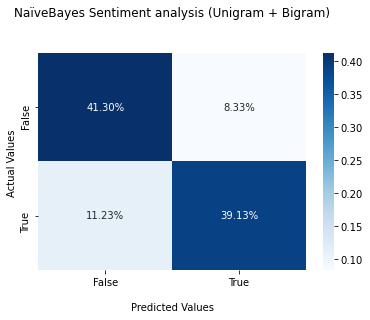

In [15]:
import seaborn as sns
ax = sns.heatmap(cm12/np.sum(cm12), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('NaïveBayes Sentiment analysis (Unigram + Bigram)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.

## Conclusion

From the result, we can see increasing the size of n-gram may not necessary be ideal. This is because the size of the matrix grows exponentially as we increment n, so if we have a large corpus that is comprised of large documents our model may take a very long time to train. Secondly, it might not improve our performances.<br>
Let's look at the accuracy of different n-grams below.

In [16]:
print('Overall Accuracy of different n-grams')
print('Uni-gram:{}{}%'.format(20*' ', round(cm_acc*100,2)))
print('Bi-gram:{}{}%'.format(21*' ', round(cm2_acc*100,2)))
print('Tri-gram:{}{}%'.format(20*' ', round(cm3_acc*100,2)))
print('Uni-gram + Bi-gram:{}{}%'.format(10*' ', round(cm12_acc*100,2)))

Overall Accuracy of different n-grams
Uni-gram:                    77.9%
Bi-gram:                     76.45%
Tri-gram:                    65.94%
Uni-gram + Bi-gram:          80.43%


We can conclude the expected improvement is acheived. After adding 2-word sequence to the single words, the classifier perform the best, with 80.43% accuracy.<br>
The reason for this improvement was illustrated in the above sessions, as we look into the example of the phrase <b>'not good'</b>, unigram will seperate it into <b>'not' and 'good'</b>. We would only consider these two words individually with a unigram-only model and probably not capture that this is actually a negative sentiment because the word ‘good’ by itself is going to be highly correlated with a positive review.<br>
<b>Uni-gram + Bi-gram</b> is able to solve this issue nicely, as it <b>add on the consideration for the phrase 'not good' as a whole </b>and thus more likely to classifer it as a negative sentiment.

## Reference

Nithyashree, V., 2021. What Are n-grams and How to Implement Them in Python? [Online] - Available from: https://www.analyticsvidhya.com/blog/2021/09/what-are-n-grams-and-how-to-implement-them-in-python/
[Accessed 03 Jan 2022]